# Import Dependencies 

In [1]:
# Main Libraries

import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Getting the Data

In [2]:
train_csv_path = os.path.join("playground-series-s4e1/", "train.csv")
test_csv_path = os.path.join("playground-series-s4e1/", "test.csv")

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [3]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
print(f'Train data shape: {train_df.shape}')
print(f'Test data shape: {test_df.shape}')

Train data shape: (165034, 14)
Test data shape: (110023, 13)


In [5]:
test_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [6]:
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
train_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
165029    False
165030    False
165031    False
165032    False
165033    False
Length: 165034, dtype: bool

# Exploratory Data Analysis (EDA)

In [9]:
plt.style.use('classic')

# For continuous data
def plot_histogram(data, column):
    plt.figure(figsize=(10, 6))
    
    plt.hist(data[column], bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column} Data', fontsize=16)
    plt.xlabel(f'{column} Range', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()
    
# For categorical data
def plot_pie(data, column, colormap='Paired'):
    plt.figure(figsize=(10, 6))
    
    values = data[column].value_counts()
    labels = values.index
    cmap = plt.get_cmap(colormap)
    colors = cmap(range(len(values)))
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title(f'Pie Chart of {column} Data', fontsize=16)
    plt.show()

# Bar graph between two columns using sum
def plot_bar_graph_sum(data, column1, column2):
    plt.figure(figsize=(10, 6))
    
    grouped_data = data.groupby(column1)[column2].sum().reset_index()
    grouped_data = grouped_data.sort_values(by=column2, ascending=False)

    plt.bar(grouped_data[column1], grouped_data[column2], color='blue', edgecolor='black')
    plt.title(f'Sum of {column2} by {column1}', fontsize=16)
    plt.xlabel(column1, fontsize=14)
    plt.ylabel(column2, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  
    plt.show()
    
# Bar graph between two columns using mean
def plot_bar_graph_mean(data, column1, column2):
    plt.figure(figsize=(10, 6))
    
    grouped_data = data.groupby(column1)[column2].mean().reset_index()
    grouped_data = grouped_data.sort_values(by=column2, ascending=False)

    plt.bar(grouped_data[column1], grouped_data[column2], color='blue', edgecolor='black')
    plt.title(f'Average of {column2} by {column1}', fontsize=16)
    plt.xlabel(column1, fontsize=14)
    plt.ylabel(column2, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  
    plt.show()
    
# Scatter plot with two columns
def plot_scatter(data, column1, column2):
    plt.figure(figsize=(10, 6))
    
    plt.scatter(data[column1], data[column2], color='blue', edgecolor='black')
    plt.title(f'Scatter Plot of {column2} vs {column1}', fontsize=16)
    plt.xlabel(column1, fontsize=14)
    plt.ylabel(column2, fontsize=14)
    plt.tight_layout()  
    plt.show()

## Credit Score

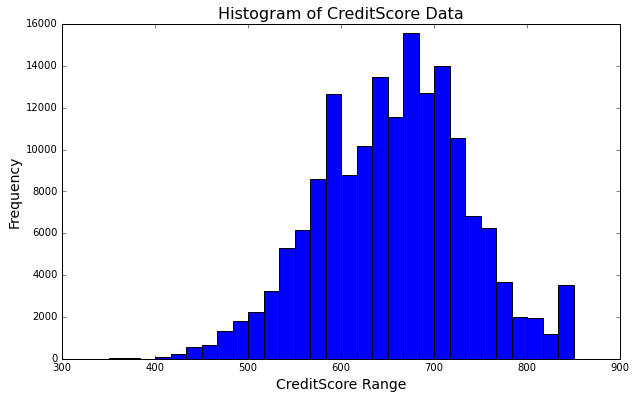

In [10]:
# Let us see the distribution of credit scores

plot_histogram(train_df, 'CreditScore')

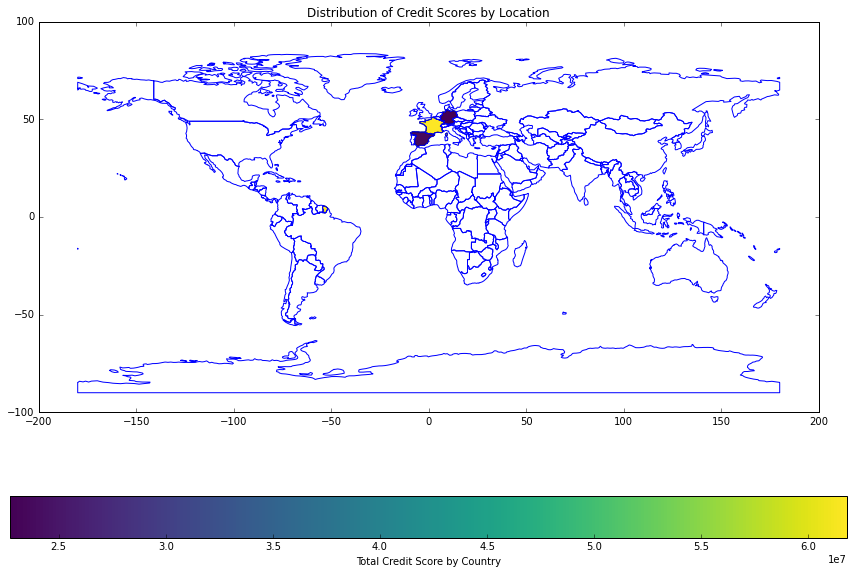

In [11]:
# Let us see how this distribution is spread across the world
import geopandas as gpd

credit_score_by_location = train_df.groupby('Geography')['CreditScore'].sum().reset_index()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(credit_score_by_location, how='left', left_on='name', right_on='Geography')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
merged.plot(column='CreditScore', ax=ax, legend=True, legend_kwds={'label': "Total Credit Score by Country", 'orientation': "horizontal"},  cmap='viridis')
plt.title('Distribution of Credit Scores by Location')
plt.show()

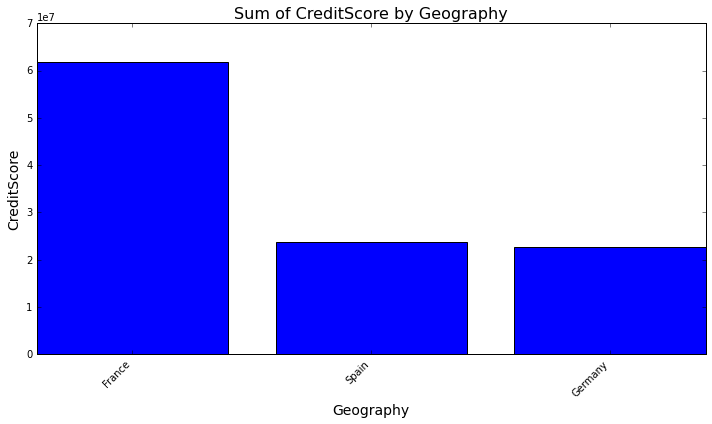

In [12]:
# We can make this clearer with a bar graph

plot_bar_graph_sum(train_df, 'Geography', 'CreditScore')

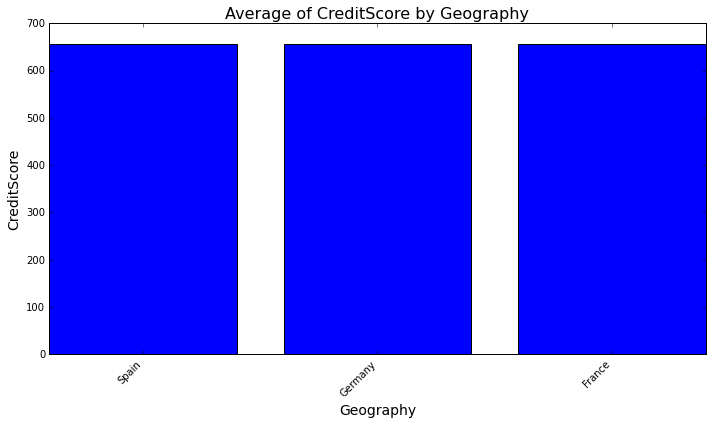

In [13]:
# The graph above shows the sum, but let us see the average credit score in these countries

plot_bar_graph_mean(train_df, 'Geography', 'CreditScore')

In [14]:
# There must be more people from France in the dataset

print(train_df['Geography'].value_counts())

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64


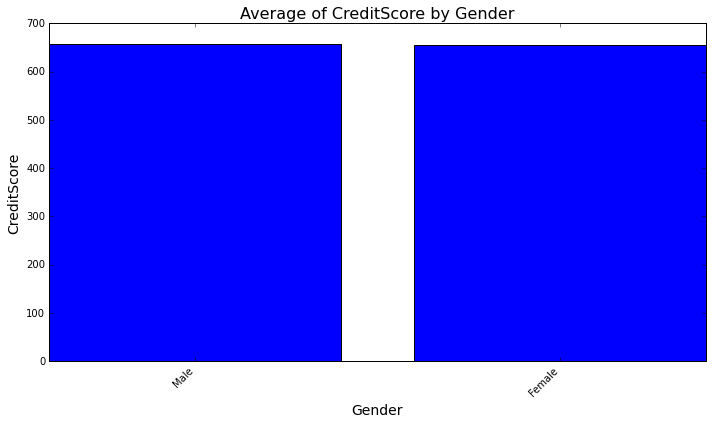

In [15]:
# Average credit score for males and females

plot_bar_graph_mean(train_df, 'Gender', 'CreditScore')

In [16]:
# Once again, the mean is the same, however there may be more instances of one gender than the other

print(train_df['Gender'].value_counts())

Gender
Male      93150
Female    71884
Name: count, dtype: int64


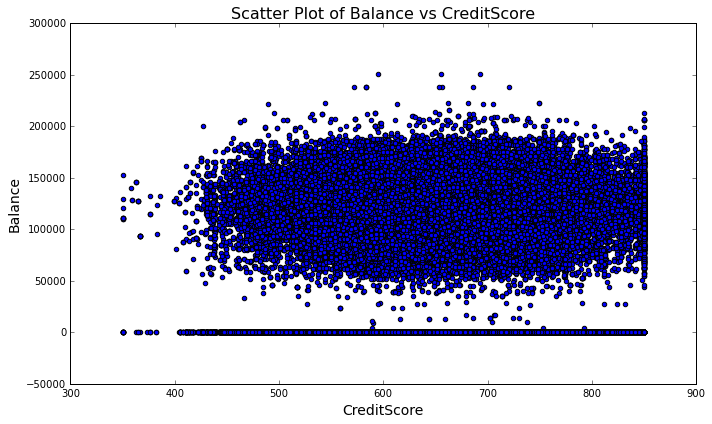

In [17]:
# Let's now examine the relationship between credit score and balance

plot_scatter(train_df, 'CreditScore', 'Balance')

No evident relationship, one can have a high balance and low credit score, as well as the other way around.

Is this the same with the estimated salary feature?

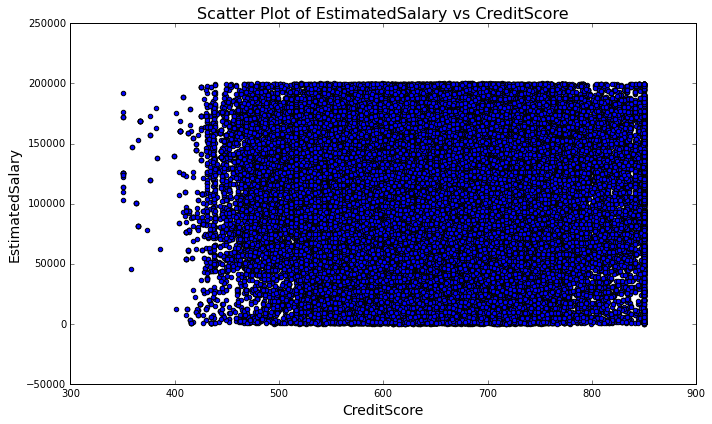

In [18]:
plot_scatter(train_df, 'CreditScore', 'EstimatedSalary')

Looks as if there is no relationship that can be seen. There will be later confirmations when the correlation matrix is observed.

Before we examine other features, let us see how tenure affects credit scores on average.

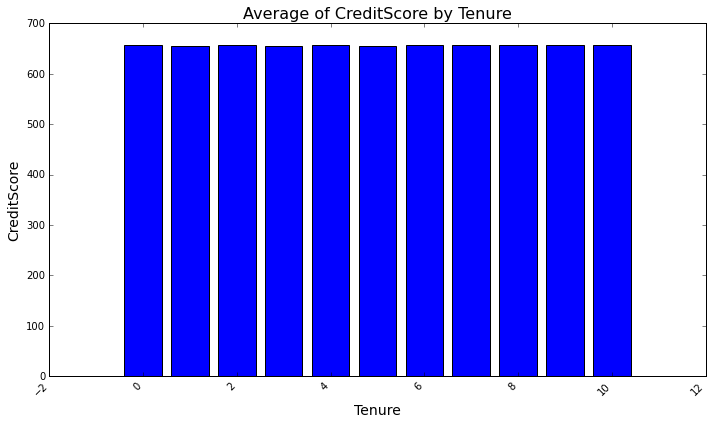

In [19]:
plot_bar_graph_mean(train_df, 'Tenure', 'CreditScore')

## Estimated Salary

Let's start by observing the distribution of the dataset's estimated salaries.

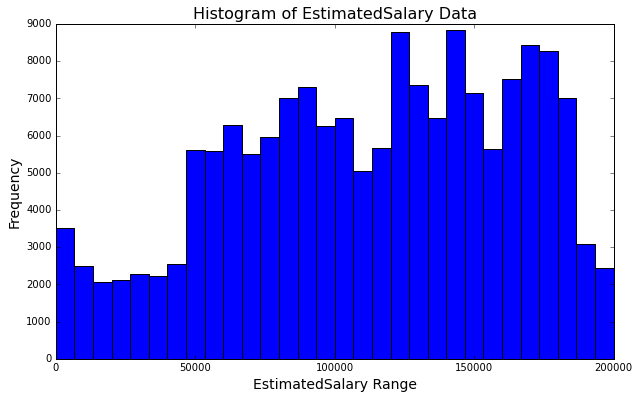

In [20]:
plot_histogram(train_df, 'EstimatedSalary')

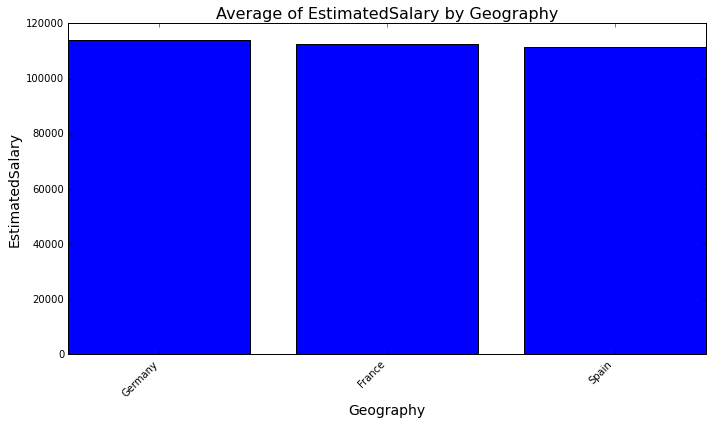

In [21]:
# Average estimated salary for each country

plot_bar_graph_mean(train_df, 'Geography', 'EstimatedSalary')

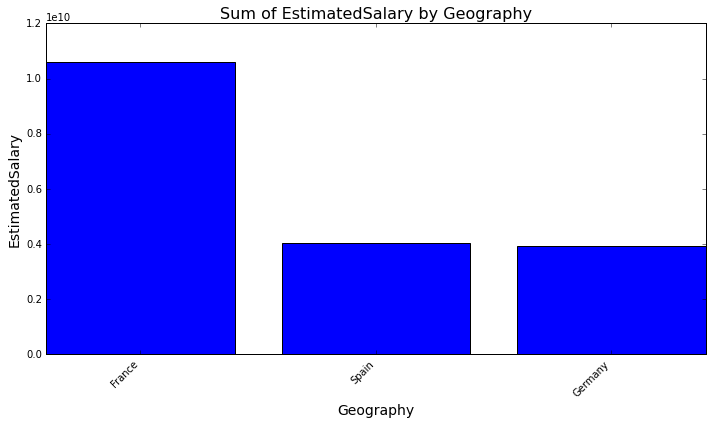

In [22]:
# Sum of estimated salaries for each country

plot_bar_graph_sum(train_df, 'Geography', 'EstimatedSalary')

As expected as there are more instances of France than any other country.

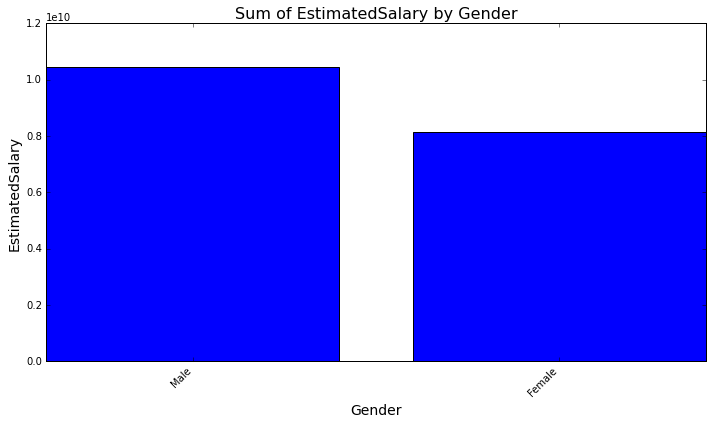

In [23]:
# Average estimated salary for each gender

plot_bar_graph_sum(train_df, 'Gender', 'EstimatedSalary')

This was interesting to see as usually the averages are similar, however this time males earn more than females on average.

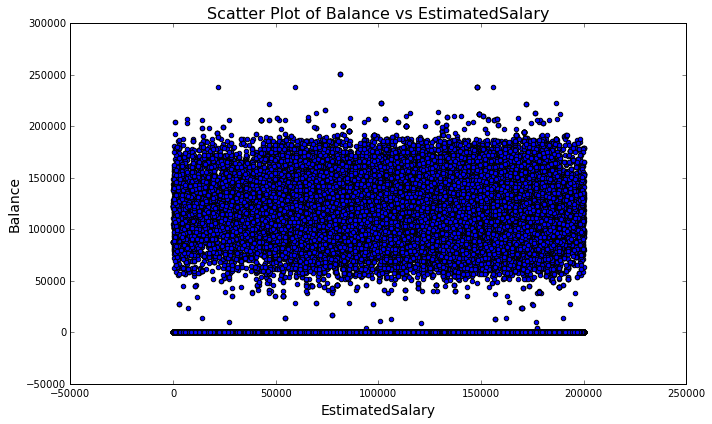

In [24]:
# Balance vs. estimated salary scatter plot

plot_scatter(train_df, 'EstimatedSalary', 'Balance')

As we did earlier with credit score, let's see how tenure plays a role in the estimated salary.

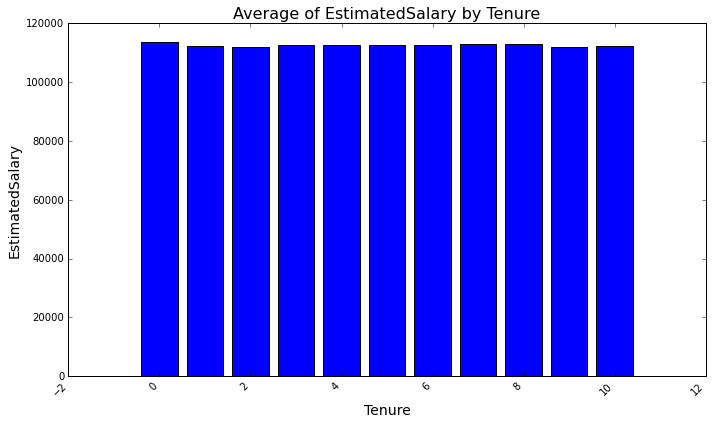

In [25]:
plot_bar_graph_mean(train_df, 'Tenure', 'EstimatedSalary')

Before we wrap up with our visualizations, let us observe the distributions of the categorical variables.

## Other Visualization

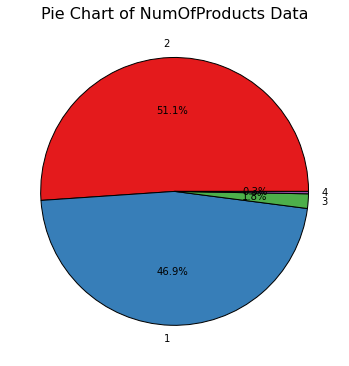

In [26]:
# NumOfProducts

plot_pie(train_df, 'NumOfProducts', colormap='Set1')

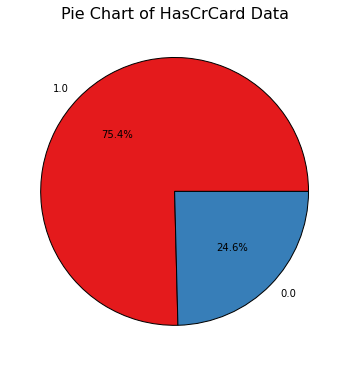

In [27]:
# HasCrCard

plot_pie(train_df, 'HasCrCard', colormap='Set1')

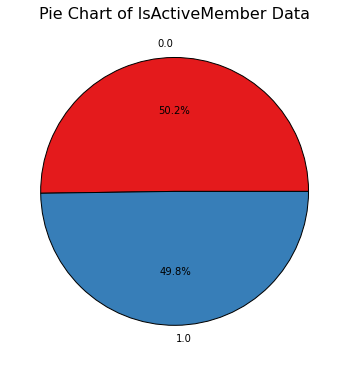

In [28]:
# IsActiveMember

plot_pie(train_df, 'IsActiveMember', colormap='Set1')

And finally, let us see the distribution of our target variable - 'Exited'.

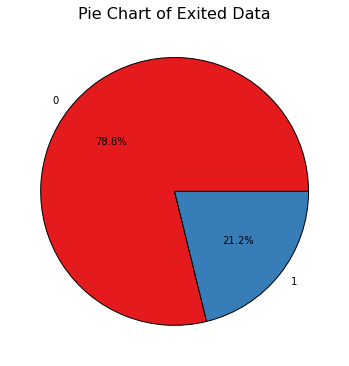

In [29]:
# Exited

plot_pie(train_df, 'Exited', colormap='Set1')

We will make sure our final split of data follows this distribution.

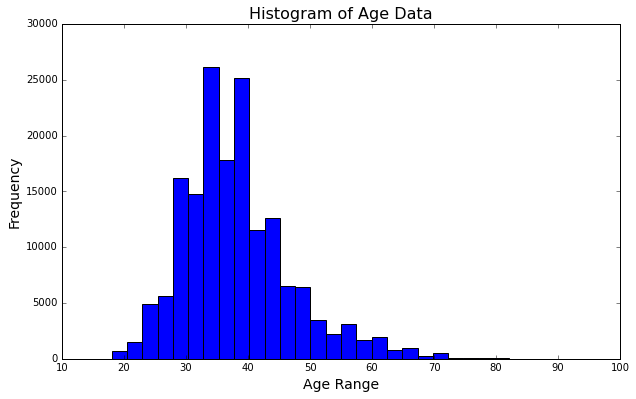

In [30]:
# Since we forgot to visualize the distribution of age, this is plotted below

plot_histogram(train_df, 'Age')

## Correlation Heatmap

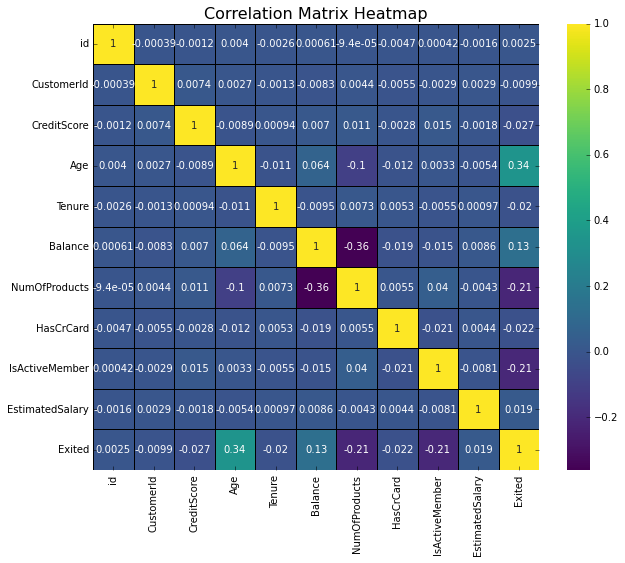

In [31]:
import seaborn as sns

numeric_train_df = train_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [32]:
correlation_matrix["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.340768
Balance            0.129743
EstimatedSalary    0.018827
id                 0.002512
CustomerId        -0.009947
Tenure            -0.019565
HasCrCard         -0.022141
CreditScore       -0.027383
IsActiveMember    -0.210237
NumOfProducts     -0.214554
Name: Exited, dtype: float64

It looks as if age has the highest correlation to our target variable out of all the numerical features.

# Preprocessing

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [34]:
X = train_df.drop('Exited', axis=1)
y = train_df['Exited']

In [35]:
# We will drop surname here as this is a string feature, but will be added back later with a vectorizer. 

class PreprocessorPipeline(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Nothing to impute.
        return self
    def transform(self, X, y=None):
        X = X.drop('id', axis=1)
        X = X.drop('CustomerId', axis=1)
        X = X.drop('Surname', axis=1)
        return X

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
categorical_columns = X.drop(['id', 'CustomerId', 'Surname'], axis=1).select_dtypes(include=["object"]).columns
numerical_columns = X.drop(['id', 'CustomerId', 'Surname'], axis=1).select_dtypes(exclude=["object"]).columns

In [38]:
print(categorical_columns)
print(numerical_columns)

Index(['Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [39]:
categorical_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])
numerical_pipeline = Pipeline([("scaler", StandardScaler())])

transformer_pipeline = ColumnTransformer([
    ("cat", categorical_pipeline, categorical_columns),
    ("num", numerical_pipeline, numerical_columns)
])
transformer_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Geography', 'Gender'], dtype='object')),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object'))])

# Final Pipelines with Different Algorithms

In [47]:
# Two of the following algorithms are not used due to computational requirements

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
mlpipe_RFC = Pipeline([("Preprocessing", PreprocessorPipeline()), ("Transformer", transformer_pipeline),
                   ("RFC", RandomForestClassifier())])

mlpipe_GBC = Pipeline([("Preprocessing", PreprocessorPipeline()), ("Transformer", transformer_pipeline),
                   ("GBC", GradientBoostingClassifier())])

mlpipe_LR = Pipeline([("Preprocessing", PreprocessorPipeline()), ("Transformer", transformer_pipeline),
                   ("LR", LogisticRegression())])

mlpipe_SVC = Pipeline([("Preprocessing", PreprocessorPipeline()), ("Transformer", transformer_pipeline),
                   ("SVC", SVC())])

mlpipe_KNC = Pipeline([("Preprocessing", PreprocessorPipeline()), ("Transformer", transformer_pipeline),
                   ("KNC", KNeighborsClassifier())])

# Splitting Data

In [42]:
train_to_test_ratio = 0.8
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=1-train_to_test_ratio, random_state=42)

for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [43]:
y_train.value_counts()

Exited
0    104090
1     27937
Name: count, dtype: int64

In [44]:
print(f'0 values in our y_train: {round((104090 / (104090 + 27939) * 100), 2)}%')
print(f'1 values in our y_train: {round((27939 / (104090 + 27939) * 100), 2)}%')

0 values in our y_train: 78.84%
1 values in our y_train: 21.16%


This is exactly the distribution of our dataset.

# Briefly Testing the Pipelines on Data

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List of pipelines
pipelines = [mlpipe_RFC, mlpipe_GBC, mlpipe_LR, mlpipe_KNC]
pipeline_names = ["RandomForestClassifier", "GradientBoostingClassifier", "LogisticRegression", "KNeighborsClassifier"]

# Dictionary to store the results
results = {}

# Train and evaluate each pipeline
for pipeline, name in zip(pipelines, pipeline_names):
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate metrics (we will only do accuracy for now)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    results[name] = accuracy

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

print(results_df)

                        Model  Accuracy
0      RandomForestClassifier  0.857727
1  GradientBoostingClassifier  0.864271
2          LogisticRegression  0.833460
3        KNeighborsClassifier  0.847578


We see the gradient boosting classifier had highest results. We will use this for now.

# Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

# We do it on the whole dataset this time
cv_scores = cross_val_score(mlpipe_GBC, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.2f}")
print(f"Standard deviation: {cv_scores.std():.2f}")

Cross-validation accuracy scores: [0.86599812 0.86281698 0.86593753 0.86236253 0.8642974 ]
Mean accuracy: 0.86
Standard deviation: 0.00


# Grid Search for Hyperparameter Tuning

Can we use a grid search to get slightly better accuracy?

Skip this step as my computer is not powerful enough, sadly.

In [56]:
'''

from sklearn.model_selection import GridSearchCV

# Define the parameter grid with the correct prefix for the GradientBoostingClassifier step
param_grid = [
    {
        "GBC__learning_rate": [0.01, 0.05, 0.1],
        # "GBC__min_samples_split": np.linspace(0.1, 0.5, 5),
        # "GBC__min_samples_leaf": np.linspace(0.1, 0.5, 5),
        "GBC__max_depth": [1, 2, 4],
        "GBC__subsample": [0.25, 0.5, 0.75],
        "GBC__n_estimators": [10, 50, 100]
    }
]

# Create the GridSearchCV object with the pipeline and the parameter grid
grid_search = GridSearchCV(mlpipe_GBC, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

final_gbc_model = grid_search.best_estimator_

y_pred = final_gbc_model.predict(X_test)

final_gbc_accuracy_score = accuracy_score(y_test, y_pred)
final_gbc_accuracy_score

'''
pass

# Confusion Matrix

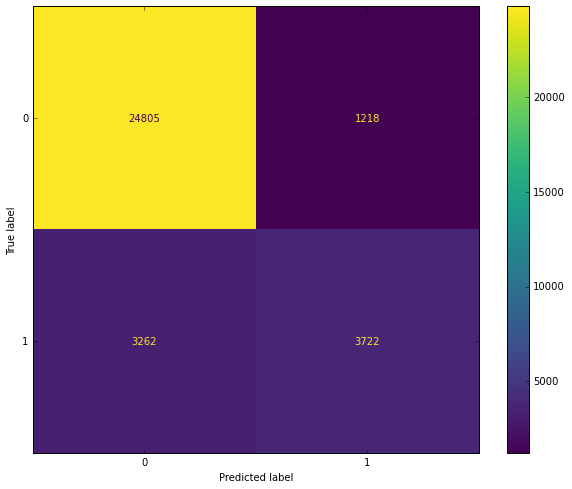

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Fit the model on the training set
mlpipe_GBC.fit(X_train, y_train)

# Step 2: Predict the labels for the test set
y_pred = mlpipe_GBC.predict(X_test)

# Step 3: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlpipe_GBC.classes_)

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed
disp.plot(ax=ax)

plt.show()

In [66]:
print(f'Correct labels: {24805 + 3722}')
print(f'Percentage correct: {round((24805 + 3722) / (24805 + 3722 + 3262 + 1218) * 100, 2)}%')

Correct labels: 28527
Percentage correct: 86.43%


As seen already.

Let's now see this machine learning pipeline on the test data.

# Applying the Pipeline on Testing Data

In [67]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [69]:
probabilities = mlpipe_GBC.predict_proba(test_df)[:, 1]

# Create a DataFrame with the required format
output_df = pd.DataFrame({
    'id': test_df['id'],
    'Exited': probabilities
})

# Save the results to a new CSV file
output_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


In [72]:
# Save the model

import pickle 

with open('mlpipe_GBC_model.pkl', 'wb') as gbc_model_file:
    pickle.dump(mlpipe_GBC, gbc_model_file)

print("Model saved to 'mlpipe_GBC_model.pkl'")

Model saved to 'mlpipe_GBC_model.pkl'


# Creating a Neural Network to Compare Accuracy

In [76]:
# Drop columns manually

X = train_df.drop(['Exited', 'id', 'CustomerId', 'Surname'], axis=1)
y = train_df['Exited']

In [79]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [95]:
# Changing categorical variables without using a column-transformer pipeline

encoder_geography = OneHotEncoder(sparse=False)
encoder_gender = OneHotEncoder(sparse=False)

encoded_geography = encoder_geography.fit_transform(X[['Geography']])
encoded_gender = encoder_gender.fit_transform(X[['Gender']])

encoded_geography_df = pd.DataFrame(encoded_geography, columns=encoder_geography.get_feature_names_out(['Geography']))
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder_gender.get_feature_names_out(['Gender']))

X = X.drop(['Geography', 'Gender'], axis=1)  # Drop original features 
X = pd.concat([X, encoded_geography_df, encoded_gender_df], axis=1)

/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1.0,0.0,0.0,0.0,1.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1.0,0.0,0.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1.0,0.0,0.0,0.0,1.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1.0,0.0,0.0,0.0,1.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0.0,0.0,1.0,1.0,0.0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,1.0,0.0,0.0,0.0,1.0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,1.0,0.0,0.0,0.0,1.0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0.0,0.0,1.0,1.0,0.0


In [104]:
# Scaling other variables

columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaled_columns = X[columns_to_scale]

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the features
X_scaled = scaler.fit_transform(scaled_columns)

# Creating a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale)

# Optionally, you can replace the original features with the scaled ones in the original DataFrame
X[columns_to_scale] = df_scaled

In [105]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,2,1.0,0.0,1.369486,1.0,0.0,0.0,0.0,1.0
1,-0.367706,-0.578074,-1.432694,-0.883163,2,1.0,1.0,-1.254085,1.0,0.0,0.0,0.0,1.0
2,0.268974,0.211354,1.774548,-0.883163,2,1.0,0.0,1.437422,1.0,0.0,0.0,0.0,1.0
3,-0.941966,-0.465299,-1.076334,1.486918,1,1.0,1.0,-0.557018,1.0,0.0,0.0,0.0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,2,1.0,1.0,-1.938770,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,-1.076334,-0.883163,1,1.0,1.0,0.382957,0.0,0.0,1.0,1.0,0.0
165030,1.692140,-0.352523,-0.719973,-0.883163,1,0.0,0.0,0.382951,1.0,0.0,0.0,0.0,1.0
165031,-1.141708,-0.803625,-0.007253,-0.883163,1,1.0,1.0,0.295366,1.0,0.0,0.0,0.0,1.0
165032,-1.279031,-0.916401,0.705467,1.688303,1,0.0,1.0,-0.823217,0.0,0.0,1.0,1.0,0.0


In [106]:
# Let's do a random split this time 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [107]:
# Sequential Model

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [108]:
strategy = tf.distribute.get_strategy()

In [109]:
def build_model():

    model = Sequential()
    model.add(Dense(64, input_shape=[X_train.shape[1]], activation='relu'))
    model.add(Dropout(0.2))  
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    
    return model

In [110]:
with strategy.scope():
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [111]:
# Early stopping for greater accuracy

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint_cb = ModelCheckpoint("bankchurn_nn_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# Putting it all together

history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
4126/4126 [==============================] - 10s 2ms/step - loss: 0.3748 - accuracy: 0.8420 - precision: 0.7006 - recall: 0.4435 - val_loss: 0.3338 - val_accuracy: 0.8595 - val_precision: 0.7227 - val_recall: 0.5406
Epoch 2/100
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3404 - accuracy: 0.8576 - precision: 0.7294 - recall: 0.5210 - val_loss: 0.3233 - val_accuracy: 0.8649 - val_precision: 0.7715 - val_recall: 0.5098
Epoch 3/100
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3355 - accuracy: 0.8593 - precision: 0.7317 - recall: 0.5299 - val_loss: 0.3219 - val_accuracy: 0.8651 - val_precision: 0.7354 - val_recall: 0.5623
Epoch 4/100
4126/4126 [==============================] - 7s 2ms/step - loss: 0.3318 - accuracy: 0.8610 - precision: 0.7349 - recall: 0.5378 - val_loss: 0.3223 - val_accuracy: 0.8652 - val_precision: 0.7411 - val_recall: 0.5536
Epoch 5/100
4126/4126 [==============================] - 7s 2ms/step - loss: 0.3307 - accur

# Visualizing Metrics

In [112]:
def plot(metric=str):
    plt.figure(figsize=(8,6))
    
    plt.plot(history.history[metric], color="teal", label=metric)
    plt.plot(history.history["val_" + metric], color="orange", label="val " + metric)
    plt.title(metric)
    plt.legend(loc="upper left")
    
    plt.show()

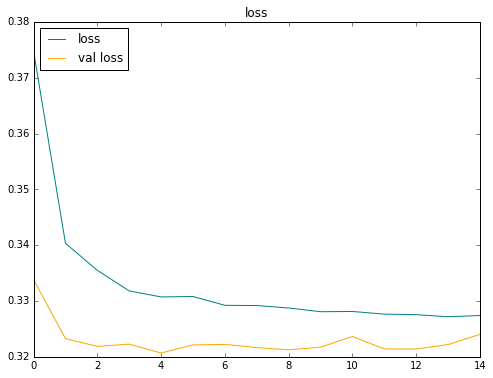

In [114]:
plot("loss")

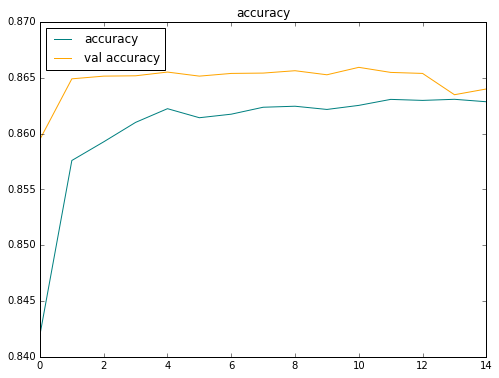

In [115]:
plot("accuracy")

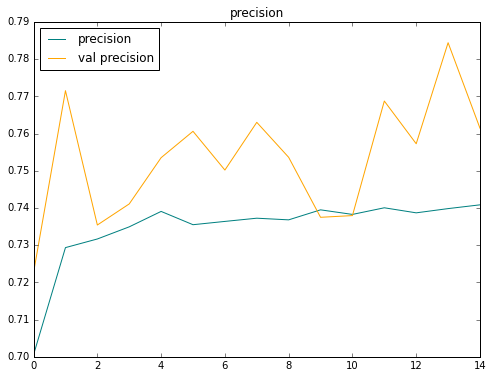

In [116]:
plot("precision")

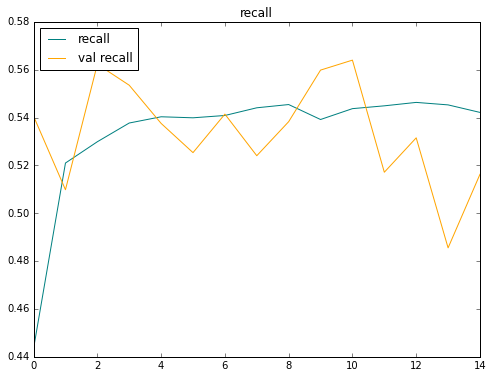

In [117]:
plot("recall")

Next time I will make sure there are more epochs for better data.

In [118]:
loss, acc, prec, rec = model.evaluate(X_test, y_test)

1032/1032 [==============================] - 1s 1ms/step - loss: 0.3207 - accuracy: 0.8655 - precision: 0.7535 - recall: 0.5376


In [119]:
print(f'Loss: {loss}\nAccuracy: {acc}\nPrecision: {prec}\nRecall: {rec}')

Loss: 0.3206820487976074
Accuracy: 0.8655133843421936
Precision: 0.7535268068313599
Recall: 0.5375988483428955


In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                896       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-traina

# Running the NN on Test Data

In [121]:
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [122]:
# Preprocessing as above 

X = test_df.drop(['id', 'CustomerId', 'Surname'], axis=1)

encoder_geography = OneHotEncoder(sparse=False)
encoder_gender = OneHotEncoder(sparse=False)

encoded_geography = encoder_geography.fit_transform(X[['Geography']])
encoded_gender = encoder_gender.fit_transform(X[['Gender']])

encoded_geography_df = pd.DataFrame(encoded_geography, columns=encoder_geography.get_feature_names_out(['Geography']))
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder_gender.get_feature_names_out(['Gender']))

X = X.drop(['Geography', 'Gender'], axis=1)  # Drop original features 
X = pd.concat([X, encoded_geography_df, encoded_gender_df], axis=1)

columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaled_columns = X[columns_to_scale]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(scaled_columns)

df_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale)

X[columns_to_scale] = df_scaled

X

/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.878176,-1.706504,-1.067887,-0.881274,2,0.0,1.0,0.967874,1.0,0.0,0.0,1.0,0.0
1,0.329567,0.888990,-1.067887,-0.881274,1,1.0,0.0,-0.790939,1.0,0.0,0.0,1.0,0.0
2,-0.006609,-0.465181,0.713922,-0.881274,2,1.0,0.0,0.528413,1.0,0.0,0.0,1.0,0.0
3,0.304665,-0.239486,1.070284,-0.881274,1,1.0,0.0,0.032150,1.0,0.0,0.0,0.0,1.0
4,1.188684,-0.013791,1.783008,1.050038,1,1.0,0.0,0.539331,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,-1.077392,-1.029419,0.713922,0.967796,1,1.0,1.0,0.711510,0.0,0.0,1.0,0.0,1.0
110019,-1.015137,-0.239486,-0.355164,1.954171,1,1.0,1.0,-1.394946,1.0,0.0,0.0,1.0,0.0
110020,0.690645,-0.803724,-1.067887,-0.881274,2,1.0,0.0,-1.909981,1.0,0.0,0.0,0.0,1.0
110021,0.653292,-0.690876,-0.711526,-0.881274,1,1.0,1.0,0.924908,1.0,0.0,0.0,1.0,0.0


In [123]:
# Loading Model 

from keras.models import load_model
model = load_model('bankchurn_nn_model.h5')

In [124]:
predictions = model.predict(X)

output_df = pd.DataFrame({
    'id': test_df['id'],  # assuming 'id' is the identifier column in the test data
    'Exited': predictions.flatten()  # flatten the predictions to a 1D array
})

output_df.to_csv('predictions2.csv', index=False)

print("Predictions saved to predictions2.csv")

3439/3439 [==============================] - 3s 804us/step
Predictions saved to predictions2.csv


# This will be the end for now. More will be done later.